In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the CSV file
df=pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#Finding the shape of the dataset
df.shape

(729322, 11)

In [5]:
#Check columns present
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
#Checking for datatypes
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#Checking for unique values
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [8]:
#checking for null values
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#Describing the data
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# Feature Engineering 

In [10]:
# Changing the pickup_datetime and dropoff_datetime from object to datetime datatype
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [11]:
# Checking to new datatype.
print(df['pickup_datetime'].dtypes)
print(df['dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


In [12]:
#Extracting seperate details from datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_min'] = df['dropoff_datetime'].dt.minute

#As the Date and time columns in the Dataset has lot of information in it, we have to fetch them as separate features.

# Univariate analysis-Categorical Data

Text(0.5, 1.0, 'Store and Forward flag')

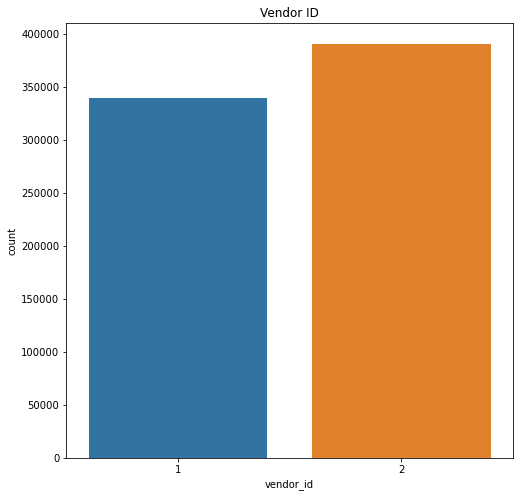

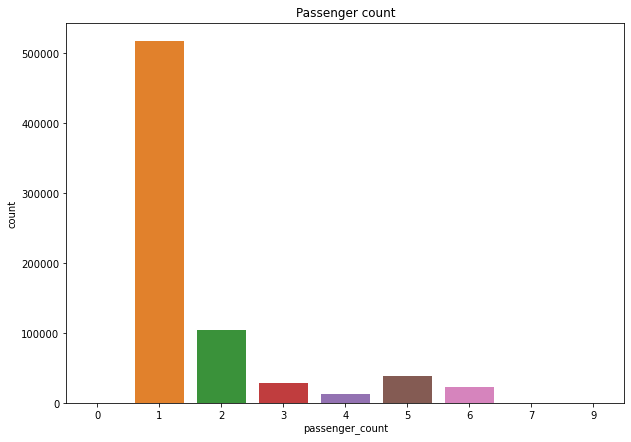

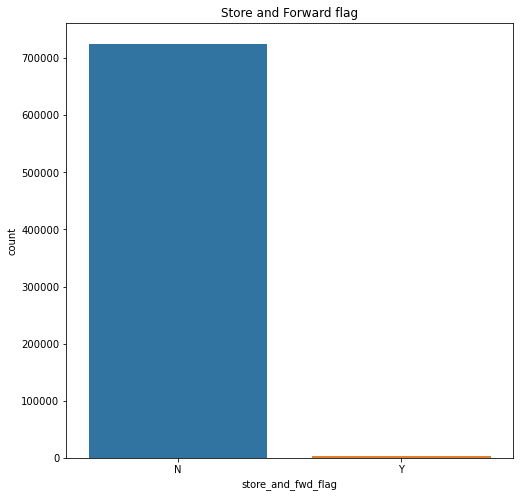

In [13]:
#Vendor ID
plt.figure(figsize=(8,8))
sns.countplot(df['vendor_id'])
plt.title("Vendor ID")
#Passenger count
plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'])
plt.title("Passenger count")
#store and forward flag
plt.figure(figsize=(8,8))
sns.countplot(df['store_and_fwd_flag'])
plt.title("Store and Forward flag")

Visualization 1: From two Vendor IDs second one is preferred slightly more than the first one.
Visualization 2: Most number of trips are done by single passenger. Trips with 5-9 passenger counts always used larger vehicle
Visulaization 3: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).
Visualization tells us that there were very few trips of which the records that were stored in memory due to no connectivity to the server.

In [14]:
#Converting Yes/No to 1/0 with the help of label encoder
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])

#Converting to binary value will help in easy computation.

<AxesSubplot:xlabel='trip_duration'>

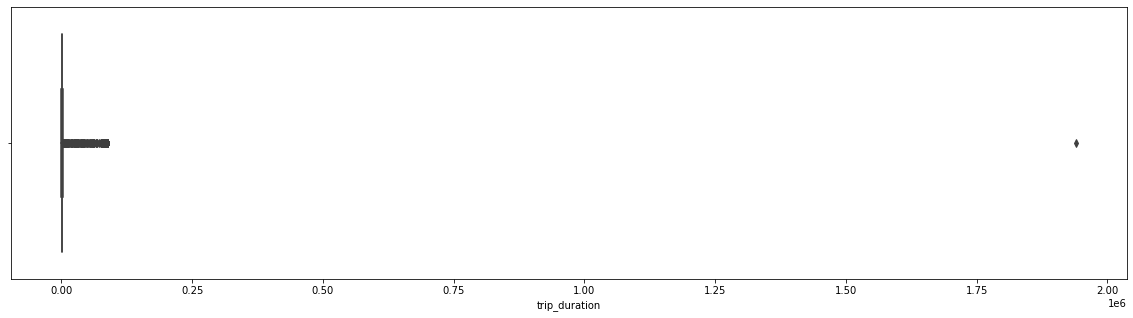

In [15]:
#Checking outliers
plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

Outlier is present in the plot

Text(0.5, 1.0, 'Log Transformed - Trip Duration')

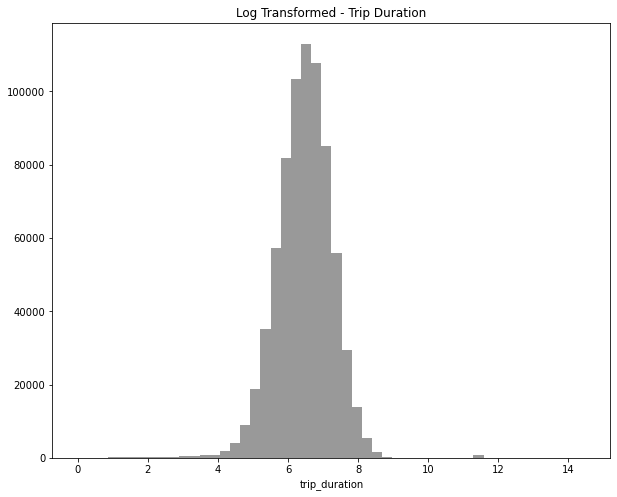

In [16]:
#Log Transformation
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

Log Transformation is used as it smoothens outliers by giving them less weightage.

In [17]:
#Checking outlier-maximum row
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,0,1939736,5,1,2016-01-05,0,19,1,8


In [18]:
#Dropping outlier-maxium row
df.drop(df[df['trip_duration'] == 1939736.00].index, inplace = True)

In [19]:
#Checking the new maxium
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
259437,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,0,86391,31,5,2016-05-31,13,0,1,0


Text(0.5, 1.0, 'Overall Monthly trips')

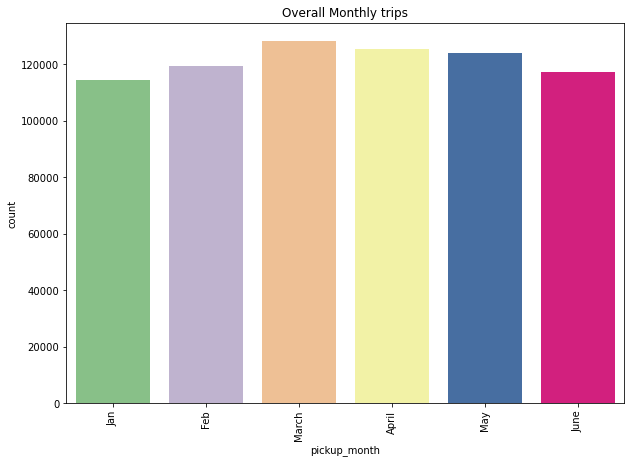

In [20]:
#monthly exploration of the trips
plt.figure(figsize=(10,7))
sns.countplot(df['pickup_month'], palette='Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','March','April','May','June'], rotation=90)
plt.title('Overall Monthly trips')

According to 6 month data. Number of trips in a particular month - March and April marking the highest. January being lowest.

Text(0.5, 1.0, 'Hourly Pickups')

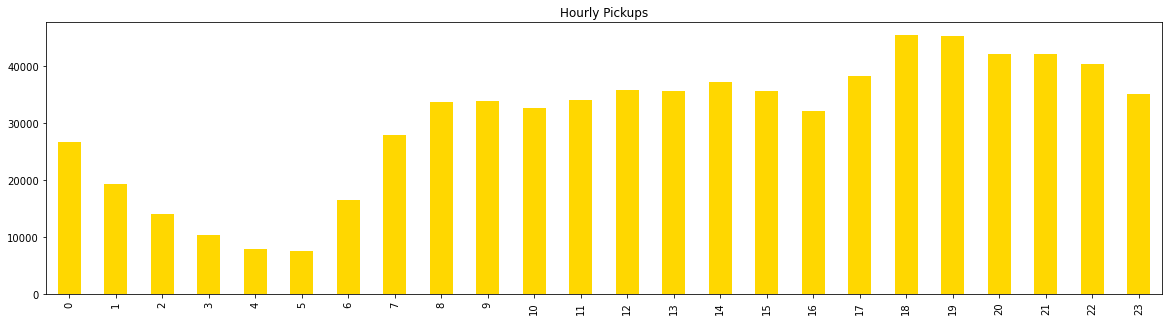

In [21]:
#Analysis of hourly pickups
plt.figure(figsize=(20,5))
pickup_hour = df['pickup_hour'].value_counts()
pickup_hour.sort_index().plot(kind='bar', color='gold')
plt.title("Hourly Pickups")

Text(0.5, 1.0, 'Overall Week day Trips')

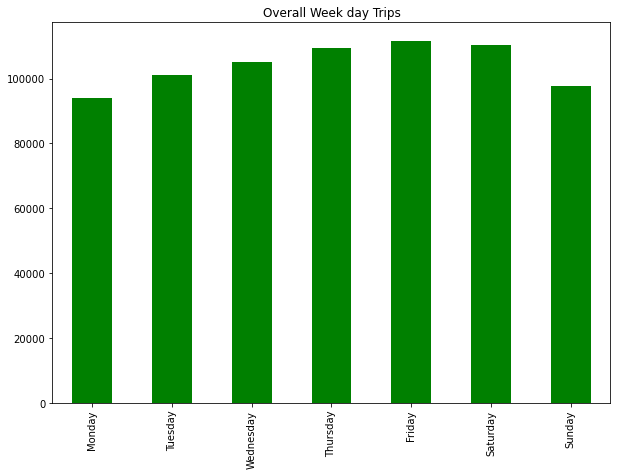

In [22]:
#Analysis of week day trips
plt.figure(figsize=(10,7))
pickup_week = df['pickup_weekday'].value_counts()
pickup_week.sort_index().plot(kind='bar', color='Green')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.title('Overall Week day Trips')

Observations-Fridays and Saturdays have the most number of trips.

Text(0.5, 1.0, 'Daily Trips Plot')

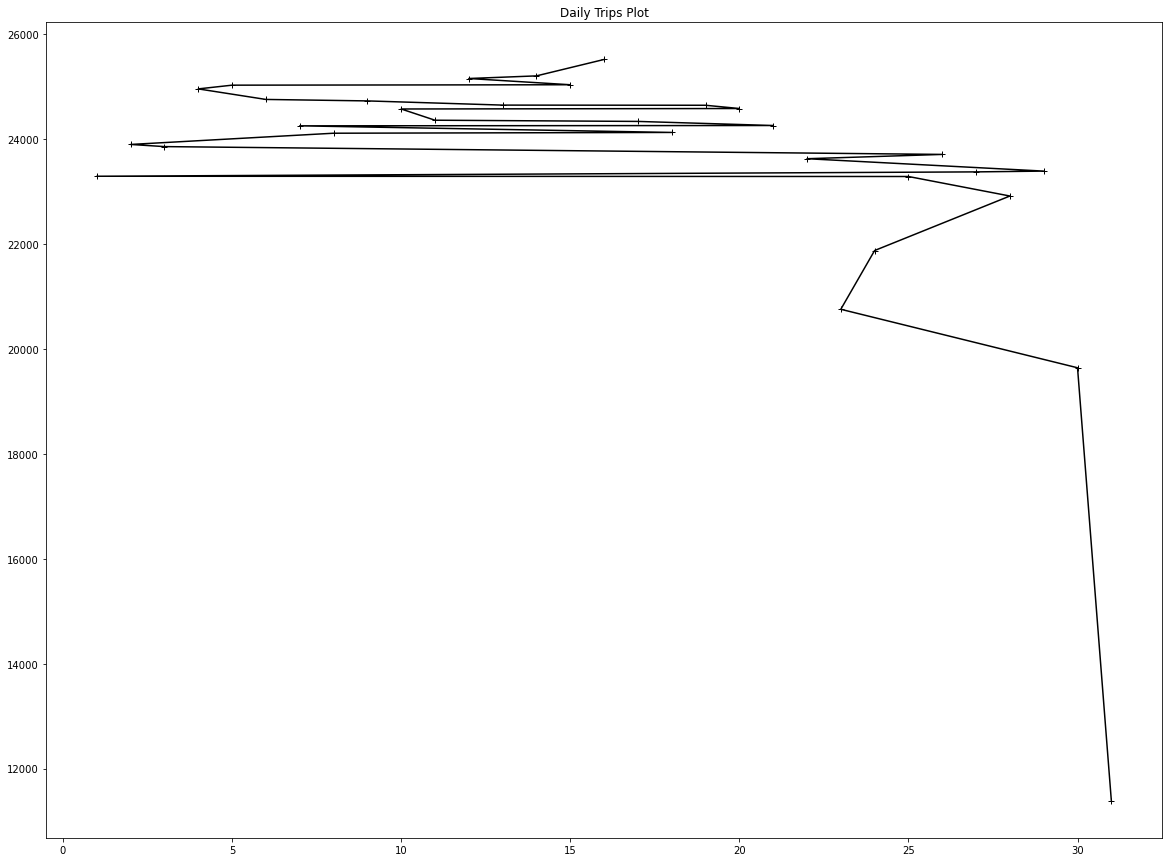

In [23]:
#Analysis of Daily trip
plt.figure(figsize=(20,15))
df['pickup_day'].value_counts().plot(color="black", marker="+")
plt.title('Daily Trips Plot')

Text(0.5, 1.0, 'Correlation Plot')

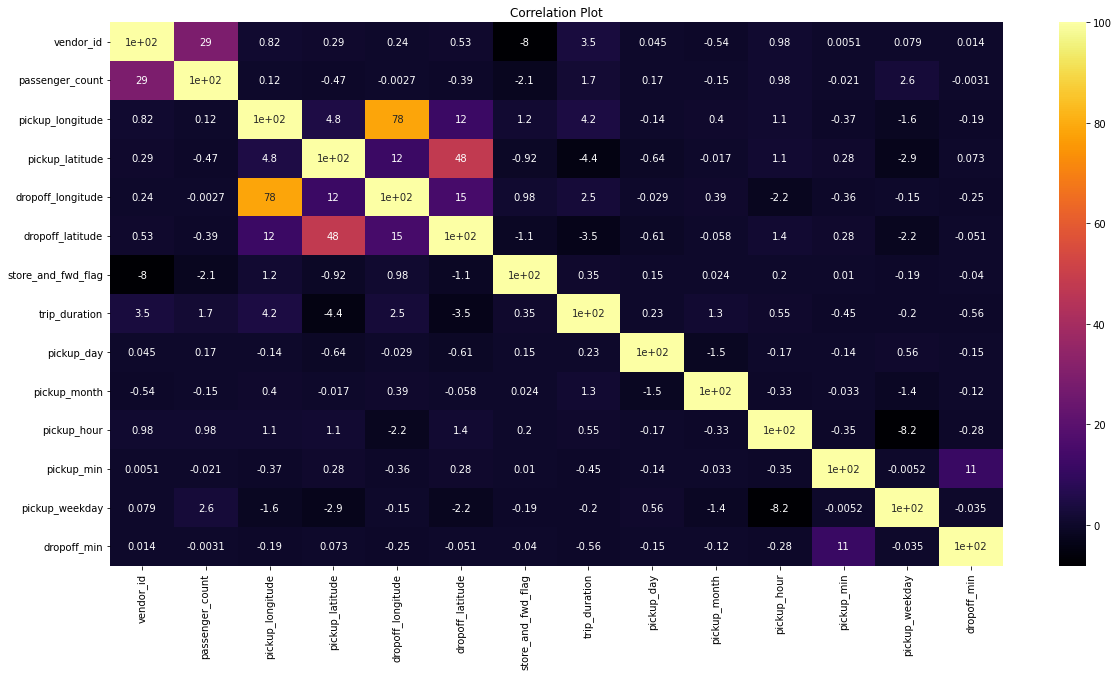

In [24]:
#Pearson Correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [25]:
#dropping unwanted columns
nyc_taxi_df = df.drop(['id','pickup_datetime','dropoff_datetime'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,17,2,2016-02-17,6,42,2,56


In [26]:
#Predictors Variable and Target Variable
X = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y = np.log(nyc_taxi_df['trip_duration'])

In [27]:
#check first 5 rows of X
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,2016-02-17,6,42,2,56


In [28]:
#Removing the pickup_date column
del X['pickup_date']
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,6,42,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,0,21,5,13,29,5,34
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,0,22,2,0,43,0,48
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,0,15,4,18,56,4,8
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,0,19,6,9,50,6,58


In [29]:
# Normalising Predictors and creating new dataframe
from sklearn.preprocessing import StandardScaler
cols = X.columns
ss = StandardScaler()
new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.931531,-0.504444,0.280916,0.832128,0.137199,0.538014,-0.074634,1.551525,-0.903464,0.373004,0.600159,-1.560058,0.997049
1,-1.073501,0.257492,-0.212153,-0.570823,-0.306500,-1.577380,-0.074634,-0.517497,-0.308459,1.466270,0.311682,0.486534,1.341480
2,0.931531,0.257492,-0.341218,-0.876963,0.364913,0.642175,-0.074634,0.631959,-0.903464,0.529185,1.696373,1.509831,-0.208457
3,0.931531,3.305238,0.169789,0.261977,0.239160,0.800639,-0.074634,-1.207171,-1.498469,-0.720262,0.830941,-1.048410,-1.528773
4,-1.073501,-0.504444,-0.625159,-1.263612,-0.212103,-0.309244,-0.074634,0.172177,-0.903464,-1.188804,0.715550,-0.536762,1.513695


# Linear Regression-Regularization

In [30]:
#importing train test split & other important metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from sklearn.linear_model import ridge_regression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((510524, 13), (218797, 13), (510524,), (218797,))

In [31]:
#linear regression
from sklearn.linear_model import Ridge
est_lr = Ridge()
est_lr.fit(X_train, Y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.60241328, 6.28940689, 6.63826216, ..., 6.34952136, 6.43157002,
       6.71107241])

In [32]:
#Intercept & Coef
est_lr.intercept_, est_lr.coef_

(322.8461953623118,
 array([ 2.40628281e-02,  9.53882699e-03,  1.19776494e+00, -3.47905386e+00,
         2.55269472e-02, -2.06800480e+00,  1.48217377e-01,  8.78450337e-04,
         2.23440463e-02,  4.70174895e-03, -3.49093467e-04, -1.22581531e-02,
        -8.23557421e-05]))

In [33]:
lr_pred[lr_pred<0]=0

In [34]:
#Examining metrics
print ("Training Score : " , est_lr.score(X_train, Y_train))
print ("Test Score : ", est_lr.score(X_test, Y_test))
print ("Cross Validation Score : " ,cross_val_score(est_lr, X_train, Y_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, Y_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, Y_test)))

Training Score :  0.04987829803111876
Test Score :  0.028501657290273652
Cross Validation Score :  -0.03864753197370394
R2_Score :  -15.094166075967774
RMSLE :  0.11251052838672529


In [35]:
lr_train_score=est_lr.score(X_train, Y_train)
lr_test_score=est_lr.score(X_test, Y_test)

# KNN Model 

# Segregating Independent and Dependent Variables

In [36]:
#Predictors and Target Variable
X1 = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y1 = np.log(nyc_taxi_df['trip_duration'])

In [37]:
X1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,2016-02-29,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,2016-03-11,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,2016-02-21,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,2016-01-05,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,2016-02-17,6,42,2,56


In [38]:
del X1['pickup_date']
X1

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,29,2,16,40,0,47
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,11,3,23,35,4,53
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,21,2,17,59,6,26
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,5,1,9,44,1,3
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,17,2,6,42,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,2,-73.965919,40.789780,-73.952637,40.789181,0,21,5,13,29,5,34
729318,1,1,-73.996666,40.737434,-74.001320,40.731911,0,22,2,0,43,0,48
729319,1,1,-73.997849,40.761696,-74.001488,40.741207,0,15,4,18,56,4,8
729320,1,1,-74.006706,40.708244,-74.013550,40.713814,0,19,6,9,50,6,58


# Scaling the date

In [39]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_scaled=scaler.fit_transform(X1)

In [40]:
X1=pd.DataFrame(x_scaled,columns=X1.columns)

In [41]:
X1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,1.0,0.111111,0.856226,0.353352,0.856048,0.731696,0.0,0.933333,0.2,0.695652,0.677966,0.000000,0.796610
1,0.0,0.222222,0.855612,0.350606,0.855497,0.725202,0.0,0.333333,0.4,1.000000,0.593220,0.666667,0.898305
2,1.0,0.222222,0.855451,0.350007,0.856331,0.732015,0.0,0.666667,0.2,0.739130,1.000000,1.000000,0.440678
3,1.0,0.666667,0.856087,0.352236,0.856174,0.732502,0.0,0.133333,0.0,0.391304,0.745763,0.166667,0.050847
4,0.0,0.111111,0.855098,0.349251,0.855614,0.729095,0.0,0.533333,0.2,0.260870,0.711864,0.333333,0.949153


In [42]:
#Importing train test split function
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,random_state=56)

In [43]:
#Importing KNN and mse metric
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [44]:
#Creating instance of KNN
est_knn= KNN(n_neighbors=8)
#Fitting the model
est_knn.fit(X1_train,Y1_train)
#Predicting over train set and calculating MSE
knn_predict=est_knn.predict(X1_test)
k=mse(knn_predict,Y1_test)
print('Test MSE ',k)

Test MSE  0.2448607845751628


In [45]:
def Elbow(K):
    #initiating empty list
    test_mse=[]
 
    for i in K:
        #Instance of knn
        est_knn=KNN(n_neighbors=i)
        est_knn.fit(X1_train,Y1_train)
        #Appending mse value to the empty list calculated using the predictions
        tmp=est_knn.predict(X1_test)
        tmp=mse(tmp,Y1_test)
        test_mse.append(tmp)
    return test_mse

In [46]:
#Defining K range
k=range(1,10)

In [ ]:
#Calling above defined function
test=Elbow(k)

In [ ]:
#Plotting the curves
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test mean squared error')
plt.title('Elbow curve')

Minimum error is approximately near 5
Best value of K is 5

In [ ]:
#Creating instance of KNN
est_knn= KNN(n_neighbors=5)
#Fitting the model
est_knn.fit(X2_train,Y2_train)
#Predicting over train set and calculating F1
knn_predict=est_knn.predict(X2_test)
k=mse(knn_predict,Y2_test)
print('Test MSE ',k)

In [ ]:
est_knn.score(X2_train,Y2_train)

In [ ]:
est_knn.score(X2_test,Y2_test)

In [ ]:
print ("Training Score : " , est_knn.score(X2_train,Y2_train))
print ("Test Score : ", est_knn.score(X2_test,Y2_test))
print ("Cross Validation Score : " , cross_val_score(est_knn, X2_train,Y2_train, cv=5).mean())
print ("R2_Score : ", r2_score(knn_predict, Y2_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(knn_predict, Y2_test)))

# Decision Tree

In [ ]:
#Predictors and Target Variable
X2 = nyc_taxi_df.drop(['trip_duration'], axis=1)
Y2 = np.log(nyc_taxi_df['trip_duration'])

In [ ]:
#Importing train test split function
from sklearn.model_selection import train_test_split
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,random_state=56)

In [ ]:
X2.head()

In [ ]:
del X2['pickup_date']
X2

In [ ]:
X2_test

In [ ]:
del X2_test['pickup_date']
X2_test

In [ ]:
X2_train.head()

In [ ]:
del X2_train['pickup_date']
X2_train

In [ ]:
#implementation of decision tree
from sklearn.tree import DecisionTreeRegressor
est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X2_train, Y2_train)
dt_pred = est_dt.predict(X3_test)
dt_pred

In [ ]:
#examining metrics
print ("Training Score : " , est_dt.score(X2_train, Y2_train))
print ("Test Score : ", est_dt.score(X2_test, Y2_test))
print ("Cross Validation Score : " , cross_val_score(est_dt, X2_train, Y2_train, cv=5).mean())
print ("R2_Score : ", r2_score(dt_pred, Y2_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, Y2_test)))

# Training scores of all the models 

In [ ]:
plt.figure(figsize=(10,7))
Training_score = pd.DataFrame({'Scores':np.array([est_lr.score(X_train, Y_train),est_knn.score(X1_train, Y1_train),est_dt.score(X2_train, Y2_train) ]), 'Model':np.arr
Training_score.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("Training Scores")

# Test Scores of all the models

In [ ]:
plt.figure(figsize=(10,7))
Test_score = pd.DataFrame({'Scores':np.array([est_lr.score(X_test, Y_test),est_knn.score(X1_test, Y1_test),est_dt.score(X2_test, Y2_test)]), 'Model':np.array(['Linear 
Test_score.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("Test Scores")

# R2 scores of all th models

In [ ]:
#r2 score plot for all the models
plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, Y1_test),r2_score(knn_predict,Y2_test),r2_score(dt_pred, Y3_test)]), 'Model':np.array(['Linear Regression','KNN'
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

In [ ]:
lr_pred[lr_pred<0]=0

# RMSE scores of all the models

In [ ]:
#RMSE plot
plt.figure(figsize=(10,10))
RMSE = pd.DataFrame({'RMSE':np.array([np.sqrt(mean_squared_log_error(lr_pred, Y1_test)),np.sqrt(mean_squared_log_error(knn_predict, Y2_test)),np.sqrt(mean_squared_log_e
RMSE.set_index('Model').plot(kind="bar", color="lightblue", legend=False)
plt.title("RMSE - Lesser is Better")

In [ ]:
RMSE